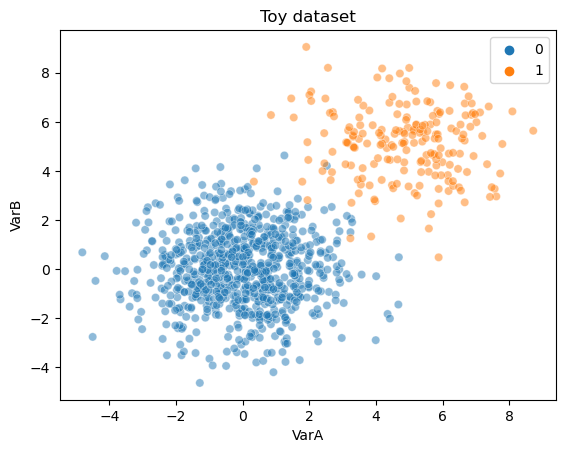

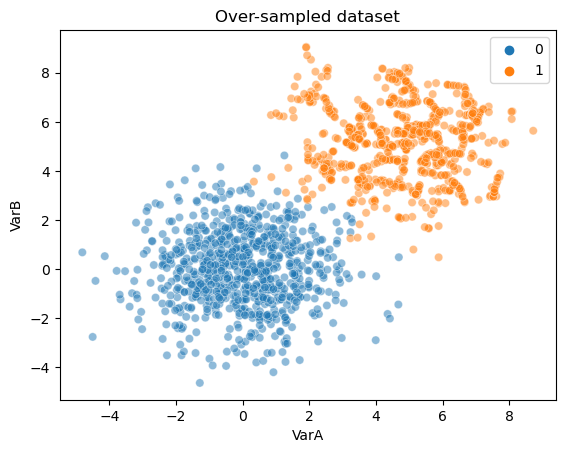

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

# Create a toy dataset with two classes
data, target = make_blobs(
    n_samples=1600,
    centers=[(0, 0), (5, 5)],
    n_features=2,
    cluster_std=1.5,
)

# Convert the data to a pandas DataFrame and the target to a pandas Series
data = pd.DataFrame(data, columns=['VarA', 'VarB'])
target = pd.Series(target)

# Undersample the second class to create imbalance
data = pd.concat([
    data[target == 0],
    data[target == 1].sample(200, random_state=42)
], axis=0)

# Adjust the target variable based on the resampled data
target = target.loc[data.index]

# Visualize the original imbalanced dataset
sns.scatterplot(data=data, x="VarA", y="VarB", hue=target, alpha=0.5)
plt.title('Toy dataset')
plt.show()

# Apply SMOTE to balance the classes by over-sampling the minority class
smote = SMOTE(
    sampling_strategy='auto',  # Automatically resample to match the majority class size
    random_state=0,
    k_neighbors=5,
)

# Generate the resampled data
data_res, target_res = smote.fit_resample(data, target)

# Visualize the oversampled dataset
sns.scatterplot(data=data_res, x="VarA", y="VarB", hue=target_res, alpha=0.5)
plt.title('Over-sampled dataset')
plt.show()
